In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

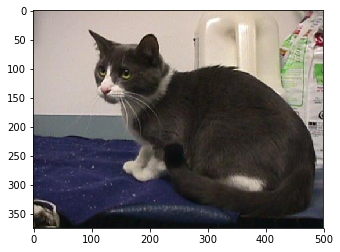

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

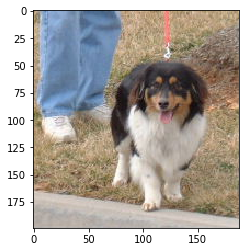

In [6]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [7]:
dog.shape

(199, 188, 3)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [10]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

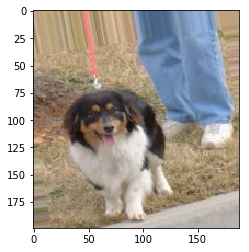

In [12]:
plt.imshow(image_gen.random_transform(dog))

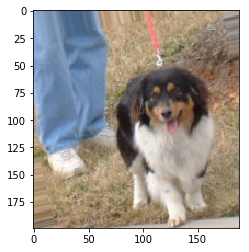

In [13]:
plt.imshow(image_gen.random_transform(dog))

In [15]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [16]:
from keras.models import Sequential

In [19]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [20]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))

model.add(Dropout(0.5)) # to get rid of over-fitting

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [22]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=(150,150),
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [23]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=(150,150),
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [24]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [25]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                              validation_data=test_image_gen,validation_steps=12) # epochs=1 only as it will take so much time. we will be using a saved model with 100 epochs.

Epoch 1/1
150/150 [==============================] - 280s 2s/step - loss: 0.6998 - acc: 0.5162 - val_loss: 0.6931 - val_acc: 0.5001


In [26]:
# import warnings
# warnings.filterwarnings('ignore')

In [27]:
results.history['acc']

[0.51625]

In [28]:
from keras.models import load_model

In [29]:
new_model = load_model('cat_dog_100epochs.h5')

In [30]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

In [31]:
from keras.preprocessing import image

In [32]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [33]:
dog_img = image.img_to_array(dog_img)

In [34]:
dog_img.shape

(150, 150, 3)

In [35]:
import numpy as np

In [36]:
dog_img = np.expand_dims(dog_img,axis=0)

In [37]:
dog_img.shape

(1, 150, 150, 3)

In [38]:
dog_img = dog_img / 255

In [39]:
new_model.predict_classes(dog_img)

array([[1]], dtype=int32)

In [41]:
new_model.predict(dog_img)

array([[0.9939143]], dtype=float32)